In [14]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license_class                           653 non-null    object 
 1   trips_per_day                           653 non-null    int64  
 2   farebox_per_day                         653 non-null    int64  
 3   unique_drivers                          653 non-null    int64  
 4   unique_vehicles                         653 non-null    int64  
 5   vehicles_per_day                        653 non-null    int64  
 6   avg_days_vehicles_on_road               653 non-null    float64
 7   avg_hours_per_day_per_vehicle           653 non-null    float64
 8   avg_days_drivers_on_road                653 non-null    float64
 9   avg_hours_per_day_per_driver            653 non-null    float64
 10  avg_minutes_per_trip                    653 non-null    float6

In [8]:
df.columns

Index(['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'percent_of_trips_paid_with_credit_card', 'trips_per_day_shared',
       'date', 'month_year1', 'trips_per_month', 'month_date',
       'farebox_per_month', 'week', 'trips_per_week', 'year',
       'farebox_per_week', 'total_trips_per_day',
       'shared_trips_per_day_percent', 'farebox_per_trip',
       'farebox_per_vehicle'],
      dtype='object')

In [11]:
df = df[['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'date', 'month_year1', 'trips_per_month', 'month_date',
       'farebox_per_month', 'year',
       'farebox_per_week', 'total_trips_per_day','farebox_per_trip',
       'farebox_per_vehicle']]

In [21]:
df['license_class'] = df['license_class'].astype('category')
df['month_date'] = pd.to_datetime(df['month_date'])
df1 = df.groupby(by=['month_date','license_class']).sum()
df1

/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_27458/2026342665.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby(by=['month_date','license_class']).sum()


trips_per_day  farebox_per_day  unique_drivers  \
month_date license_class                                                       
2010-01-28 FHV - Black Car                0                0               0   
           FHV - High Volume              0                0               0   
           FHV - Livery                   0                0               0   
           FHV - Lux Limo                 0                0               0   
           Green                          0                0               0   
...                                     ...              ...             ...   
2022-12-28 FHV - High Volume         634379                0           78091   
           FHV - Livery               17750                0            4059   
           FHV - Lux Limo              1068                0            1654   
           Green                       2336            45208             965   
           Yellow                    109290          2358924           10749   

                              unique_vehicles  vehicles_per_day  \
month_date license_class                                          
2010-01-28 FHV - Black Car                  0                 0   
           FHV - High Volume                0                 0   
           FHV - Livery                     0                 0   
           FHV - Lux Limo                   0                 0   
           Green                            0                 0   
...                                       ...               ...   
2022-12-28 FHV - High Volume            74877             52087   
           FHV - Livery                  3888              2577   
           FHV - Lux Limo                1604               521   
           Green                          942               496   
           Yellow                        7791              6529   

                              avg_days_vehicles_on_road  \
month_date license_class                                  
2010-01-28 FHV - Black Car                          0.0   
           FHV - High Volume                        0.0   
           FHV - Livery                             0.0   
           FHV - Lux Limo                           0.0   
           Green                                    0.0   
...                                                 ...   
2022-12-28 FHV - High Volume                       21.6   
           FHV - Livery                            20.6   
           FHV - Lux Limo                          10.1   
           Green                                   16.3   
           Yellow                                  26.0   

                              avg_hours_per_day_per_vehicle  \
month_date license_class                                      
2010-01-28 FHV - Black Car                              0.0   
           FHV - High Volume                            0.0   
           FHV - Livery                                 0.0   
           FHV - Lux Limo                               0.0   
           Green                                        0.0   
...                                                     ...   
2022-12-28 FHV - High Volume                            6.6   
           FHV - Livery                                 5.1   
           FHV - Lux Limo                               2.0   
           Green                                        3.6   
           Yellow                                       8.7   

                              avg_days_drivers_on_road  \
month_date license_class                                 
2010-01-28 FHV - Black Car                         0.0   
           FHV - High Volume                       0.0   
           FHV - Livery                            0.0   
           FHV - Lux Limo                          0.0   
           Green                                   0.0   
...                                                ...   
2022-12-28 FHV - High Volume                      21.1   
       

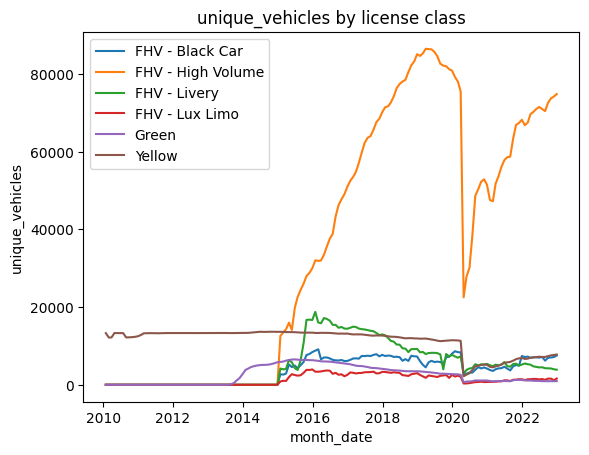

In [23]:

for lic_class in df['license_class'].unique():
    data_subset = df1.loc[df1.index.get_level_values('license_class')==lic_class]
    sns.lineplot(x=data_subset.index.get_level_values('month_date'), y=data_subset['unique_vehicles'], label=lic_class)

plt.title("unique_vehicles by license class")
plt.legend()
plt.show()


In [25]:
df2 = df1[['unique_vehicles', 'vehicles_per_day']]
df2

unique_vehicles  vehicles_per_day
month_date license_class                                       
2010-01-28 FHV - Black Car                  0                 0
           FHV - High Volume                0                 0
           FHV - Livery                     0                 0
           FHV - Lux Limo                   0                 0
           Green                            0                 0
...                                       ...               ...
2022-12-28 FHV - High Volume            74877             52087
           FHV - Livery                  3888              2577
           FHV - Lux Limo                1604               521
           Green                          942               496
           Yellow                        7791              6529

[936 rows x 2 columns]

In [26]:
df2.to_csv('metrics.csv')